<a href="https://colab.research.google.com/github/seonhara/Data_Analysis/blob/master/1%EC%B0%A8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82018_sample_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
df = pd.read_csv('/content/gdrive/MyDrive/현대로템/2019_all_종합_new.csv',encoding='cp949')

df = pd.DataFrame(df)

df.head()
#df.describe()

,구_2019년,사기,성폭력,손괴,절도,폭행,cctv,합계(외국인),한국인(합계),0~4세,...,카페,부동산중개업,한식,주거환경 만족도,경제환경 만족도,사회환경 만족도,교육환경 만족도,세금,단란주점,유흥주점
0,강남구,8364,1257,667,2986,2144,"5,459",5040,545169,15369,...,2151,"4,257","5,017",6.40,5.48,6.15,5.96,3457856,239,209
1,강동구,1742,247,448,1654,1329,"1,871",4323,436067,14581,...,607,"1,510","2,262",6.09,5.39,5.91,5.47,703426,93,122
2,강북구,1879,227,437,1228,1573,"1,656",3741,313954,7679,...,370,704,"1,911",6.20,5.02,5.67,5.41,234701,121,68
3,강서구,2744,406,584,2053,1458,"1,858",6477,591796,20648,...,784,"1,680","2,895",6.11,5.29,6.12,5.65,826542,167,126
4,관악구,2698,538,459,2260,1774,"3,388",17240,500094,11775,...,639,"1,369","2,511",6.71,5.72,5.88,5.68,406752,86,192


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# !apt-get update -qq
# !apt-get install fonts-nanum -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# # 나눔고딕 폰트 경로 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 설정 시 마이너스 기호 깨짐 방지
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf


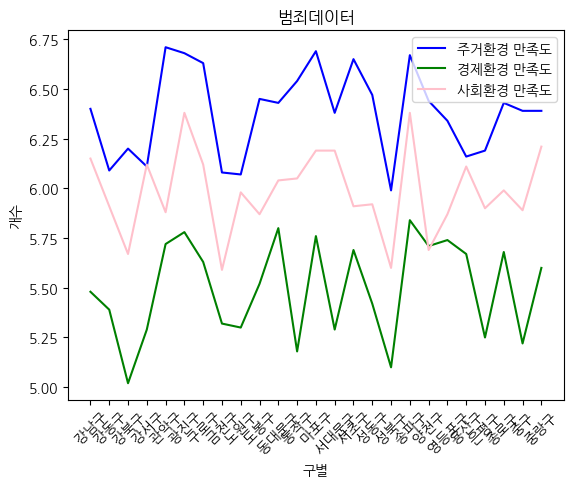

In [ ]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 설정 시 마이너스 기호 깨짐 방지
plt.title('범죄데이터')

plt.plot(range(1, len(df) + 1), df['주거환경 만족도'], label='주거환경 만족도', c='b')
plt.plot(range(1, len(df) + 1), df['경제환경 만족도'], label='경제환경 만족도', c='g')
plt.plot(range(1, len(df) + 1), df['사회환경 만족도'], label='사회환경 만족도', c='pink')

plt.xticks(ticks=range(1, len(df) + 1), labels=df['구_2019년'], rotation=45)

plt.xlabel('구별')
plt.ylabel('개수')
plt.legend()
plt.show()


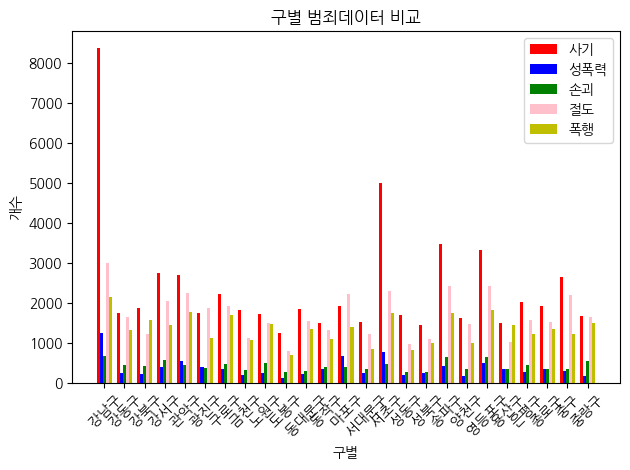

In [ ]:
# 구별 개수
n = len(df)

# x 위치 설정
x = np.arange(n)

# 막대 차트 너비 설정
width = 0.15  # 각 막대의 너비

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.title('구별 범죄데이터 비교')
plt.bar(x - 2*width, df['사기'], width, label='사기', color='r')
plt.bar(x - width, df['성폭력'], width, label='성폭력', color='b')
plt.bar(x, df['손괴'], width, label='손괴', color='g')
plt.bar(x + width, df['절도'], width, label='절도', color='pink')
plt.bar(x + 2*width, df['폭행'], width, label='폭행', color='y')

# x축에 구별 이름을 표시
plt.xticks(x, df['구_2019년'], rotation=45)

plt.xlabel('구별')
plt.ylabel('개수')
plt.legend()
plt.tight_layout()  # 그래프 요소들이 겹치지 않도록 간격 조정
plt.show()


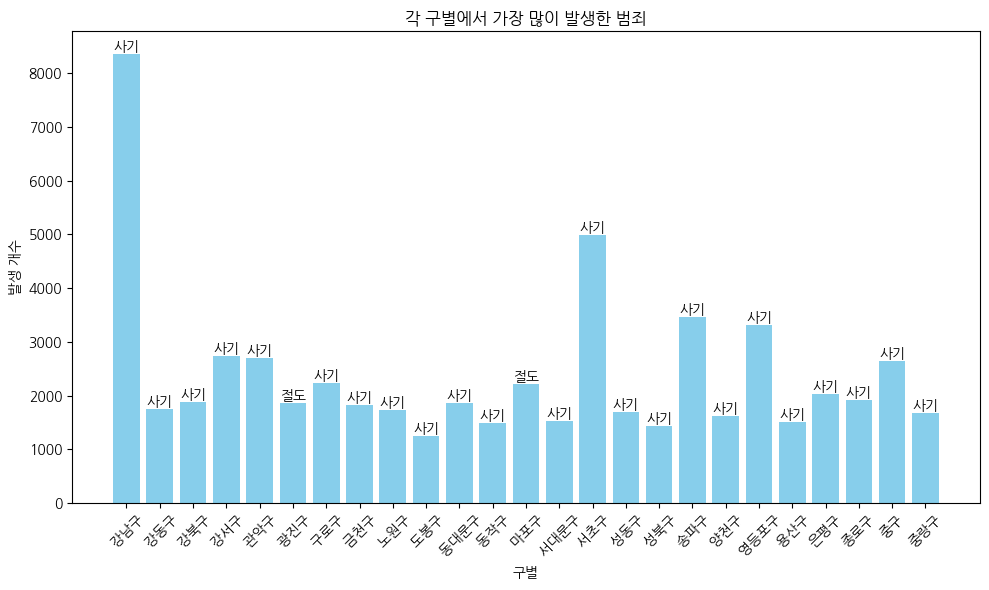

In [ ]:
# 각 구별에 대해 가장 많이 발생한 범죄 찾기
max_crime_columns = df[['사기', '성폭력', '손괴', '절도', '폭행']]  # 범죄 열만 추출
max_crime = max_crime_columns.idxmax(axis=1)  # 각 구별에서 가장 큰 값의 범죄 항목을 찾음
max_crime_values = max_crime_columns.max(axis=1)  # 각 구별에서 가장 큰 값

# 구별의 이름을 가져오기
districts = df['구_2019년']

# 시각화
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
bars = plt.bar(districts, max_crime_values, color='skyblue')

# 각 막대 위에 해당 범죄 이름을 표시
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), max_crime[i],
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('각 구별에서 가장 많이 발생한 범죄')
plt.xlabel('구별')
plt.ylabel('발생 개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
for column in df.columns[1:]:  # 첫 번째 열은 국가이므로 제외하고, 나머지 열만 처리
    df[column] = df[column].replace({',': ''}, regex=True).astype(float)

# 첫 번째 열을 제외한 나머지 열 선택
df_numeric = df.iloc[:, 1:]  # 첫 번째 열을 제외하고 모든 열을 선택

# MinMaxScaler 적용
scaler = MinMaxScaler()
scaler.fit(df_numeric)
scaled = scaler.transform(df_numeric)

# 결과를 원본 데이터프레임에 다시 결합 (첫 번째 열을 포함)
df_scaled = pd.DataFrame(scaled, columns=df_numeric.columns)
df_scaled.insert(0, df.columns[0], df.iloc[:, 0])  # 첫 번째 열을 원본 데이터프레임에서 다시 추가

# feature들의 최솟값과 최댓값 출력
print('feature들의 최솟값:')
print(df_scaled.min())
print('\nfeature들의 최대값:')
print(df_scaled.max())

feature들의 최솟값:
구_2019년       강남구
사기            0.0
성폭력           0.0
손괴            0.0
절도            0.0
폭행            0.0
cctv          0.0
합계(외국인)       0.0
한국인(합계)       0.0
0~4세          0.0
5~9세          0.0
10~14세        0.0
15~19세        0.0
20~24세        0.0
25~29세        0.0
30~34세        0.0
35~39세        0.0
40~44세        0.0
45~49세        0.0
50~54세        0.0
55~59세        0.0
60~64세        0.0
65~69세        0.0
70~74세        0.0
75~79세        0.0
80~84세        0.0
85~89세        0.0
90~94세        0.0
95~99세        0.0
100세 이상       0.0
면적 (km²)      0.0
다가구주택         0.0
다세대주택         0.0
단독주택          0.0
비주거용건물내주택     0.0
아파트           0.0
연립주택          0.0
영업겸용주택        0.0
일반단독주택        0.0
미용실           0.0
카페            0.0
부동산중개업        0.0
한식            0.0
주거환경 만족도      0.0
경제환경 만족도      0.0
사회환경 만족도      0.0
교육환경 만족도      0.0
세금            0.0
단란주점          0.0
유흥주점          0.0
dtype: object

feature들의 최대값:
구_2019년      중랑구
사기           1.0
성폭력          1.0
손괴  

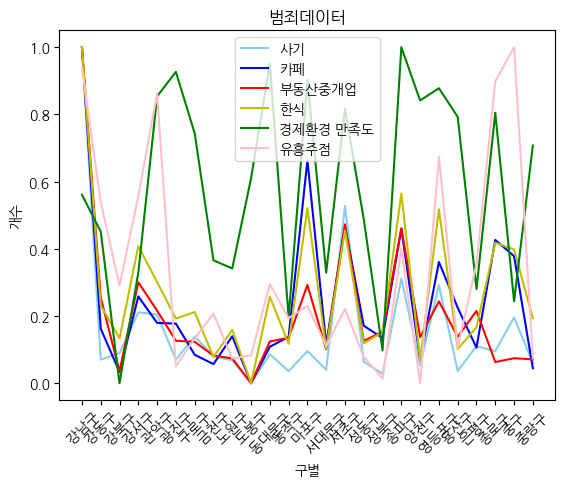

In [ ]:
plt.title('범죄데이터')

plt.plot(range(1, len(df) + 1), df_scaled['사기'], label='사기', c='skyblue')
# plt.plot(range(1, len(df) + 1), df_scaled['성폭력'], label='성폭력', c='skyblue')
# plt.plot(range(1, len(df) + 1), df_scaled['손괴'], label='손괴')
# plt.plot(range(1, len(df) + 1), df_scaled['절도'], label='절도')
# plt.plot(range(1, len(df) + 1), df_scaled['폭행'], label='폭행')

plt.plot(range(1, len(df_scaled) + 1), df_scaled['카페'], label='카페', c='b')
plt.plot(range(1, len(df_scaled) + 1), df_scaled['부동산중개업'], label='부동산중개업', c='r')
plt.plot(range(1, len(df_scaled) + 1), df_scaled['한식'], label='한식', c='y')
plt.plot(range(1, len(df_scaled) + 1), df_scaled['경제환경 만족도'], label='경제환경 만족도', c='g')
plt.plot(range(1, len(df_scaled) + 1), df_scaled['유흥주점'], label='유흥주점', c='pink')

plt.xticks(ticks=range(1, len(df) + 1), labels=df['구_2019년'], rotation=45)

plt.xlabel('구별')
plt.ylabel('개수')
plt.legend()
plt.show()